#Indian startup funding analysis-exploratory data analysis

**Project** **Overviw**

##Loading and First Look

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

##Load the dataset

In [129]:
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')

##Basic dataset information

In [130]:
df.shape

(102, 8)

In [131]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [132]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


##Data quality assessment

##cheak data types and missing values

In [133]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [134]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


##check for duplicates

In [135]:
df.duplicated().sum()

np.int64(0)

##Basic statistics

In [136]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


**key insights of discuss:**

- dataset contains 102 indian unicorn startups
- no missing values (clean dataset)
- mix of categorical and numerical data
- entry dates span from 2011 to 2022

##data preprocessing

##clean columns names

In [137]:
df.columns = df.columns.str.strip()

##convert entry column to datetime

In [138]:
df['Entry_Date'] = pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [139]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


##create valuation growth metric

In [140]:
df['Valuation_growth'] = df['Valuation ($B)'] /df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


##Extract primary city(before'/')

In [141]:
df['Primary_City'] = df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


##count number of investors

In [157]:
df['Investor_Count'] = df['Select Investors'].str.count(',') + 1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_growth,Primary_City,Investor-Count,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4,4


#Univariate Analysis

##valuation distribution analysis

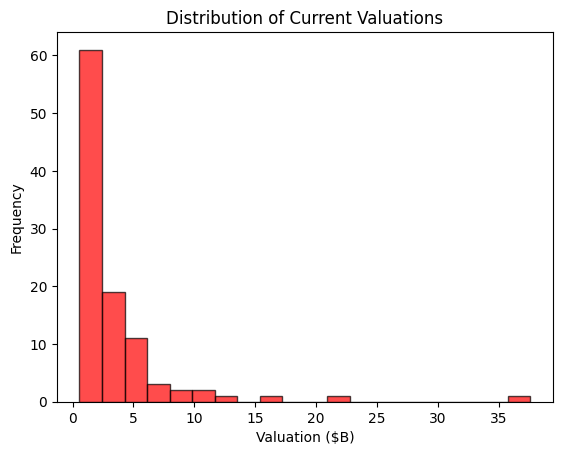

In [143]:
plt.hist(df['Valuation ($B)'],bins=20,alpha=0.7,color='red',edgecolor="black")
plt.title('Distribution of Current Valuations')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

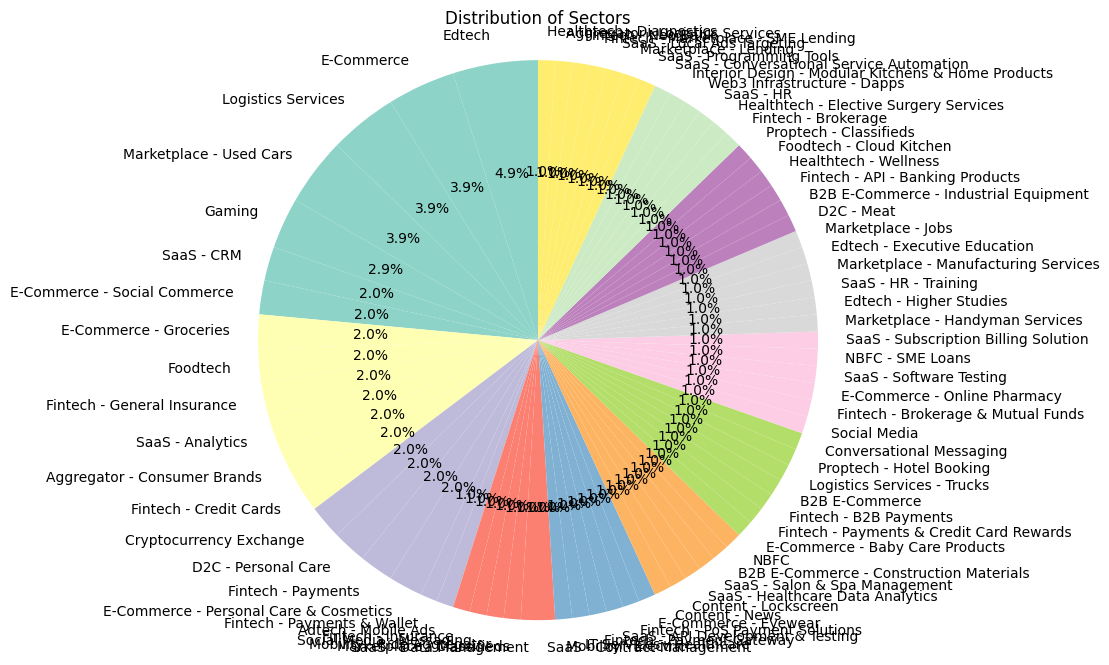

In [144]:
plt.figure(figsize=(12,8))
sector_counts = df['Sector'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(sector_counts)))

plt.pie(sector_counts.values, labels=sector_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Sectors')
plt.show()

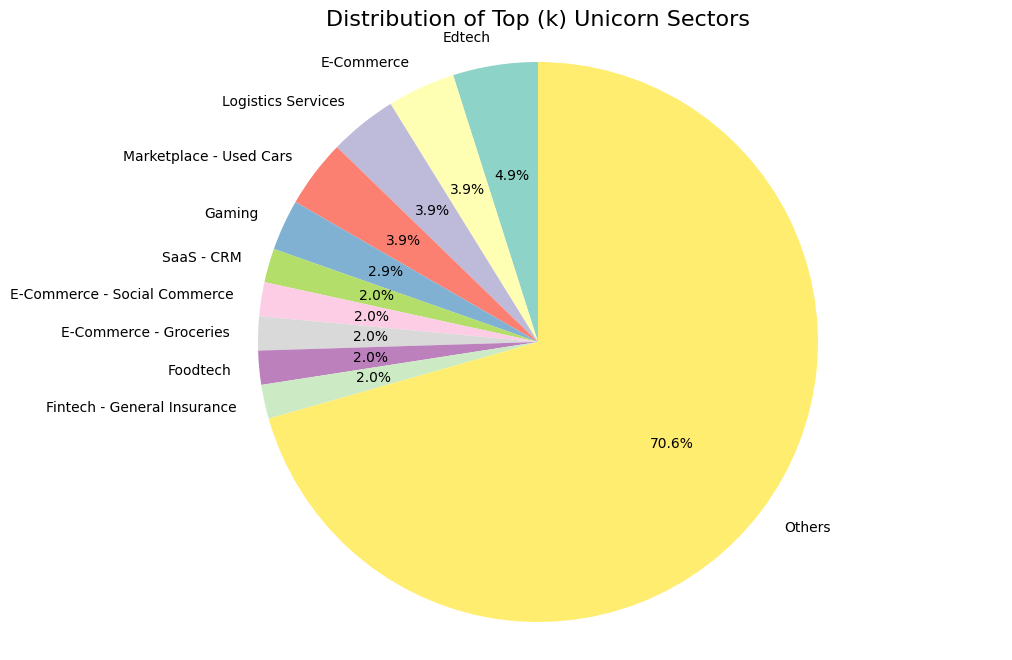

In [145]:
def display_top_k_sectors(df,k):
  sector_counts = df['Sector'].value_counts()

  if k < len(sector_counts):
    top_sectors = sector_counts.head(k)
    others_sectors_count = sector_counts.iloc[k:].sum()
    top_sectors['Others'] = others_sectors_count
  else:
    top_sectors = sector_counts
  plt.figure(figsize=(12,8))
  colours = plt.cm.Set3(np.linspace(0,1,len(top_sectors)))
  plt.pie(top_sectors.values, labels=top_sectors.index,autopct='%1.1f%%',colors=colours, startangle=90)
  plt.title(f'Distribution of Top (k) Unicorn Sectors',fontsize=16)
  plt.axis('equal')
  plt.show()

display_top_k_sectors(df,10)

## Top sectors bar chart

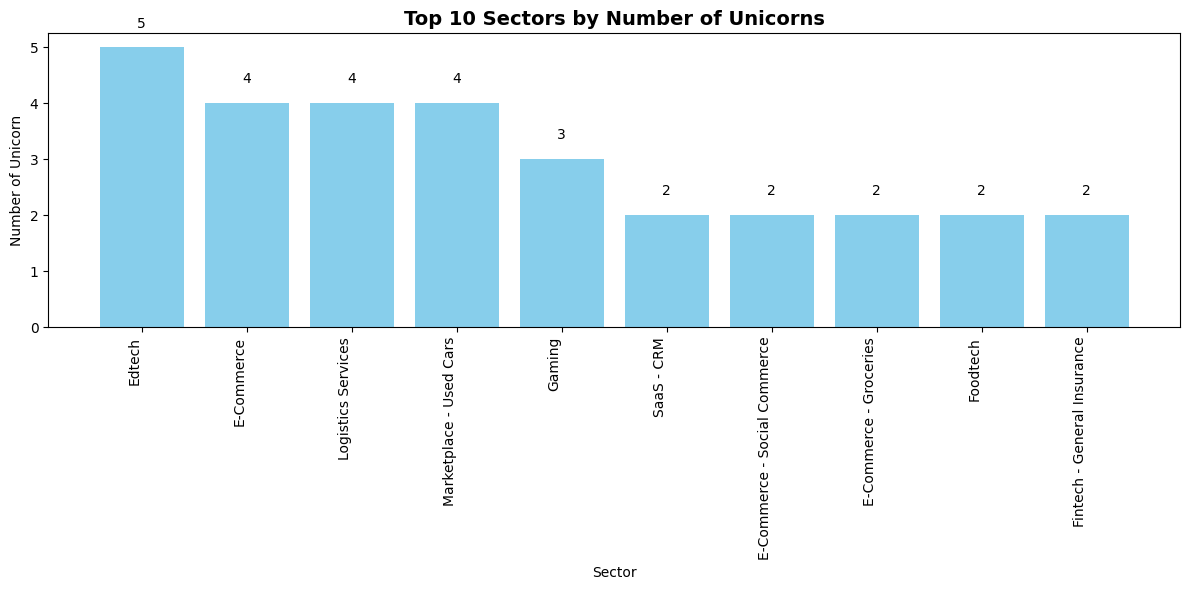

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [146]:
plt.figure(figsize=(12, 6))
top_sectors = sector_counts.head(10)
bars = plt.bar(range(len(top_sectors)), top_sectors.values, color='skyblue')
plt.bar(top_sectors.index, top_sectors.values, color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Number of Unicorn')
plt.title('Top 10 Sectors by Number of Unicorns', fontsize=14, fontweight='bold')
plt.xticks(range(len(top_sectors)), top_sectors.index, rotation=90, ha='right')

for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x() + bar.get_width()/ 2, bar.get_height() + 0.3, str(value), ha='center', va='bottom')


plt.tight_layout()
plt.show()

plt

Key insights

#Geographic Distrubution

## City-wise distribution

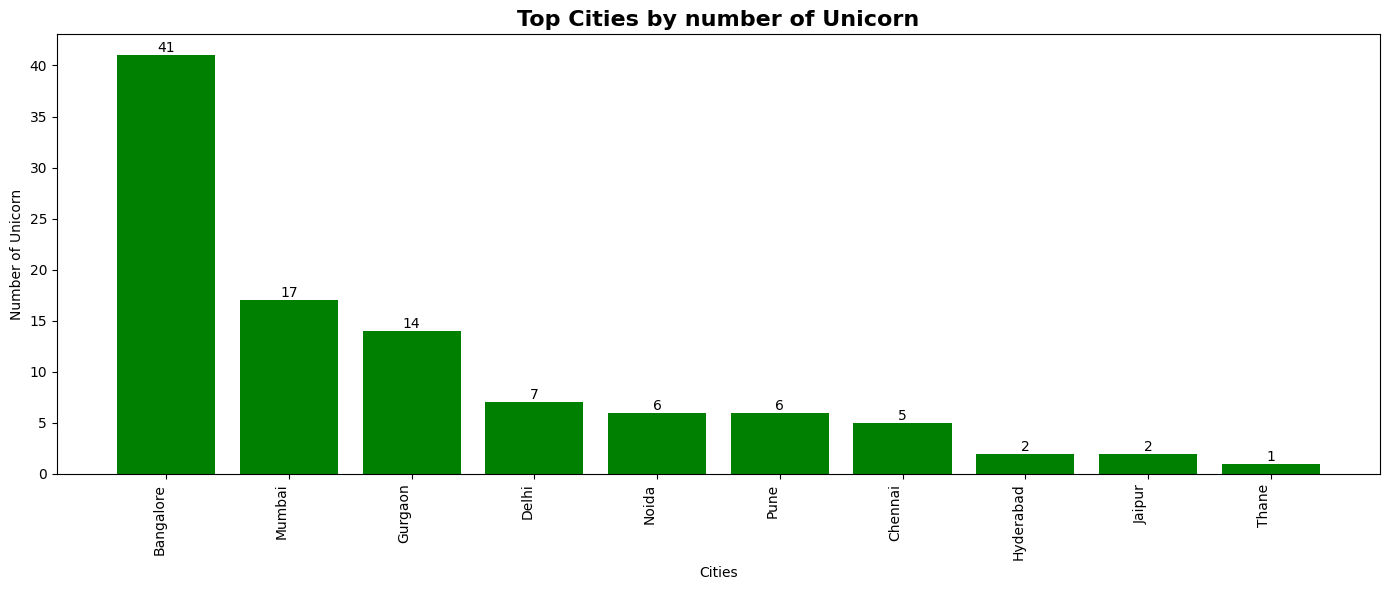

In [147]:
plt.figure(figsize=(14,6))
city_counts = df['Primary_City'].value_counts().head(10)
bars = plt.bar(city_counts.index,city_counts.values,color='green')
plt.title('Top Cities by number of Unicorn',fontsize=16,fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorn')
plt.xticks(rotation=90,ha='right')

for bar,value in zip(bars,city_counts.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),str(value),ha='center',va='bottom')
plt.tight_layout()

In [148]:
city_summary = df.groupby('Primary_City').agg({'Valuation ($B)':['count','sum','mean'],'Entry_Year':['min','max']}).round(2)
city_summary.columns = ['Count','Total Valuation','Average Valuation','Start Year','End Year']
city_summary.head(10)

,Count,Total Valuation,Average Valuation,Start Year,End Year
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


temporal analysis

entry year trends

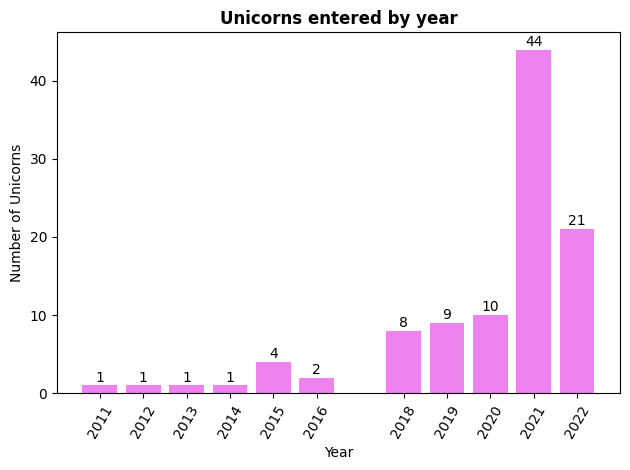

In [149]:
yearly_entries=df['Entry_Year'].value_counts().sort_index()
bars=plt.bar(yearly_entries.index,yearly_entries.values,color='violet')
plt.title('Unicorns entered by year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=60)

for bar,value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()


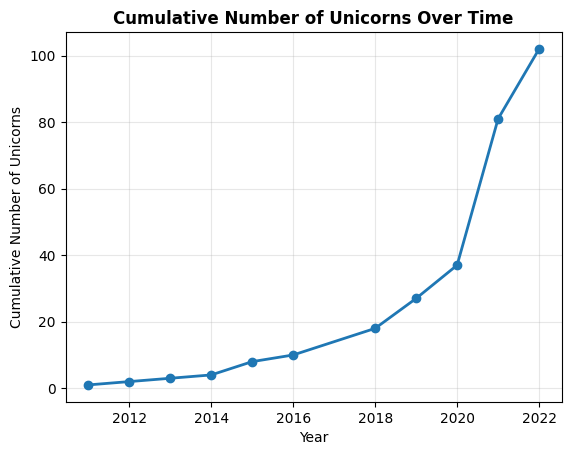

In [150]:
cumulative = yearly_entries.cumsum()
plt.plot(cumulative.index, cumulative.values,marker='o',linewidth=2,)
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Unicorns')
plt.title('Cumulative Number of Unicorns Over Time', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

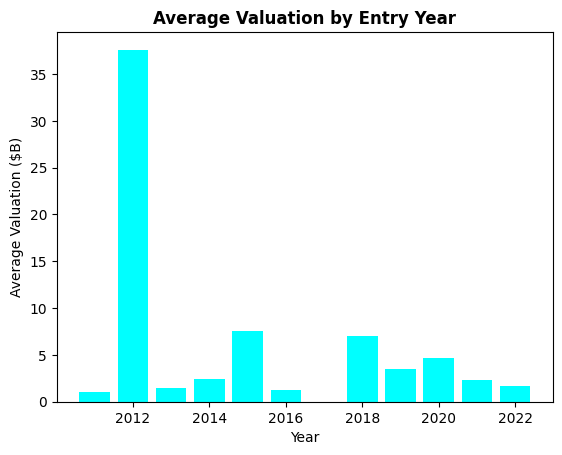

In [151]:
avg_val_by_year = df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='cyan')
plt.title('Average Valuation by Entry Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()


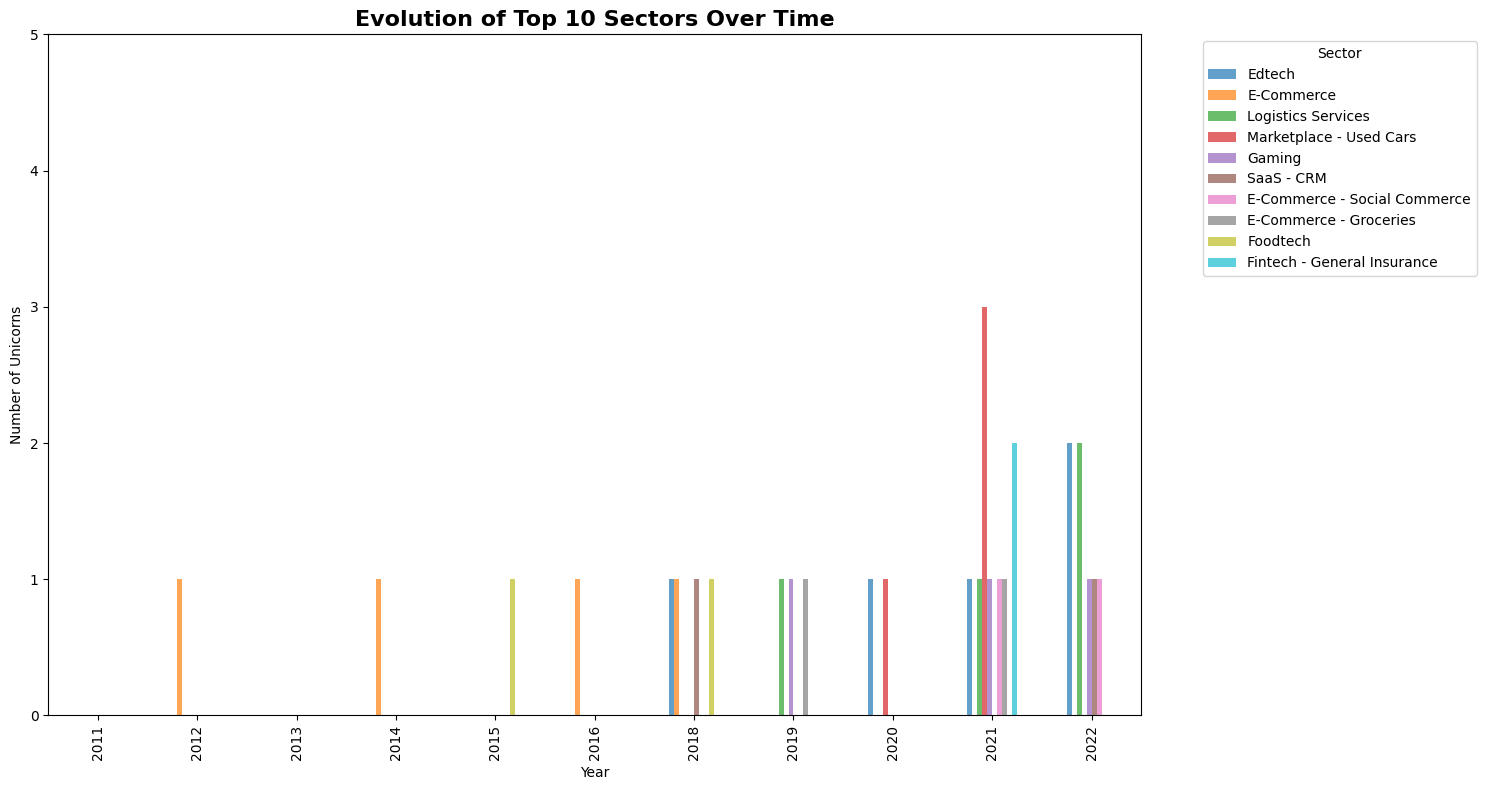

In [152]:
def display_k_sectors_evolution(df, k):
  sector_year = df.groupby(['Entry_Year', 'Sector']).size().unstack(fill_value=0)

  top_k_sectors_names = df['Sector'].value_counts().head(k).index.tolist()

  sector_year = sector_year[top_k_sectors_names]

  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7, ax=plt.gca())

  plt.title(f'Evolution of Top {k} Sectors Over Time', fontweight='bold', fontsize=16)
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.yticks(range(0, sector_year.values.max()+3))
  plt.tight_layout()
  plt.show()

display_k_sectors_evolution(df, 10)

##bivariate analysis

##valuation vs sector analysis

##average valuation by sector

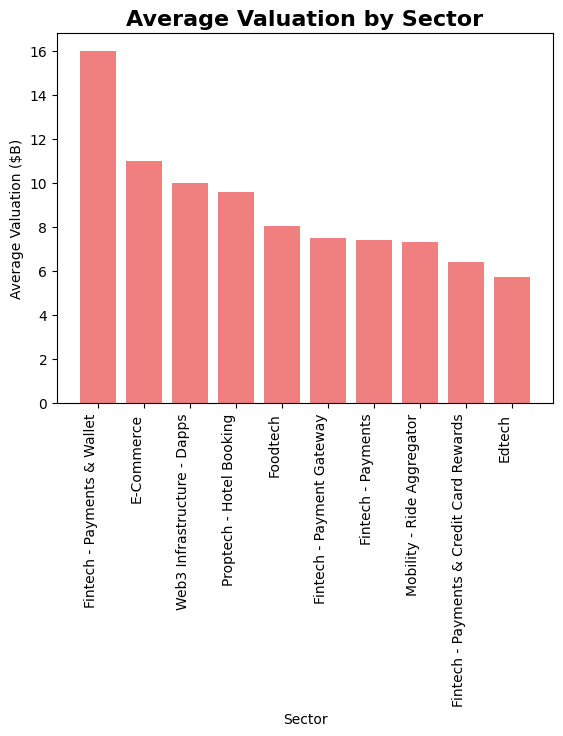

In [153]:
avg_valuation = df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation = avg_valuation.sort_values(ascending=False).head(10)
bars = plt.bar(range(len(avg_valuation)),avg_valuation.values,color='lightcoral')
plt.title('Average Valuation by Sector',fontsize=16,fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)),avg_valuation.index,rotation=90,ha='right')
plt.show()

##sector hidden output


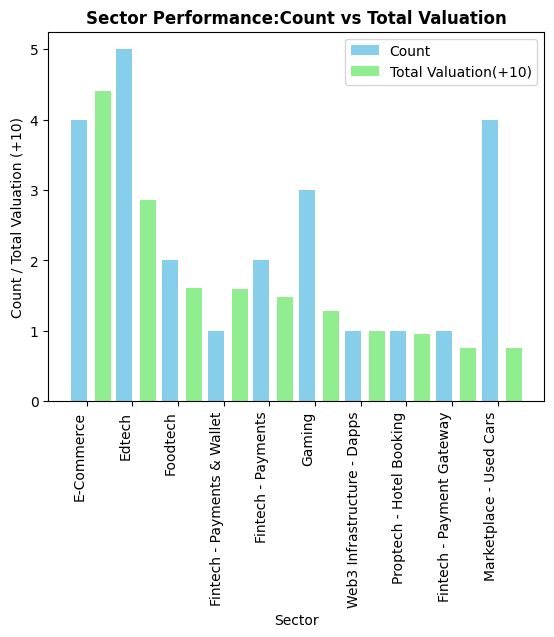

In [154]:
sector_summary = df.groupby('Sector').agg({'Valuation ($B)':['count','sum']}).round(2)
sector_summary.columns = ['Count','Total Valuation']
sector_summary = sector_summary.sort_values('Total Valuation',ascending=False).head(10)

x=np.arange(len(sector_summary))
width=0.35

plt.bar(x - width/2, sector_summary['Count'],width,label='Count',color='skyblue')
plt.bar(x+width,sector_summary['Total Valuation']/10,width,label='Total Valuation(+10)',color='lightgreen')
plt.xlabel('Sector')
plt.ylabel('Count / Total Valuation (+10)')
plt.title('Sector Performance:Count vs Total Valuation',fontweight='bold')
plt.xticks(x,sector_summary.index,rotation=90, ha='right')
plt.legend()
plt.show()

##average valuation by city

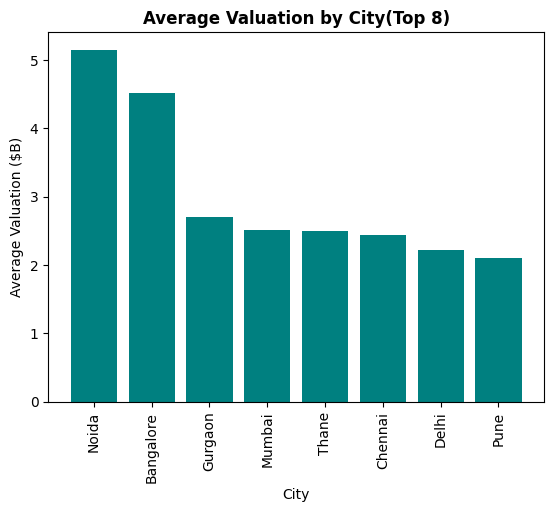

In [155]:
city_valuation = df.groupby('Primary_City')['Valuation ($B)'].mean()
city_valuation = city_valuation.sort_values(ascending=False).head(8)

bars = plt.bar(city_valuation.index,city_valuation.values, color='teal')
plt.title('Average Valuation by City(Top 8)',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=90)
plt.show()


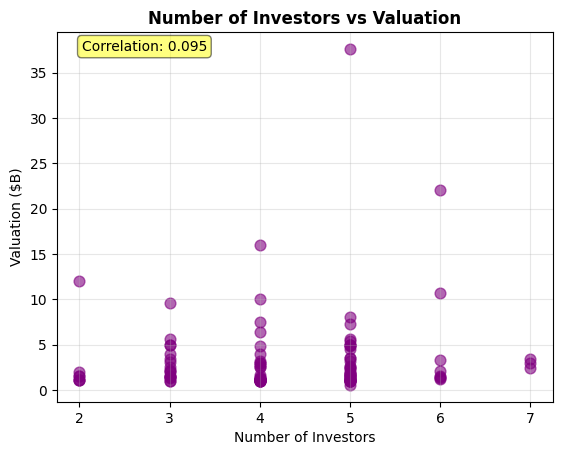

In [158]:
plt.scatter(df['Investor_Count'], df['Valuation ($B)'], alpha=0.6, s=60, color='purple')
plt.title('Number of Investors vs Valuation', fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation ($B)')
plt.grid(True, alpha=0.3)

correlation = df['Investor_Count'].corr(df['Valuation ($B)'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, bbox=dict(boxstyle="round, pad=0.3",facecolor="yellow", alpha=0.5))

plt.show()

##most  active investors

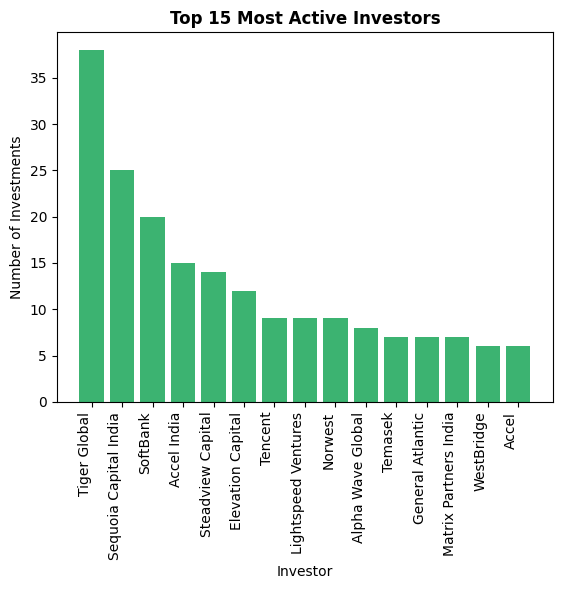

In [160]:
all_investor =[]
for Investors in df['Select Investors'].dropna():
    all_investor.extend(inv.strip() for inv in Investors.split(','))
investors_counts = pd.Series(all_investor).value_counts().head(15)
bars = plt.bar(range(len(investors_counts)),investors_counts.values,color='mediumseagreen')
plt.title('Top 15 Most Active Investors',fontweight='bold')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(range(len(investors_counts)),investors_counts.index,rotation=90,ha='right')
plt.show()

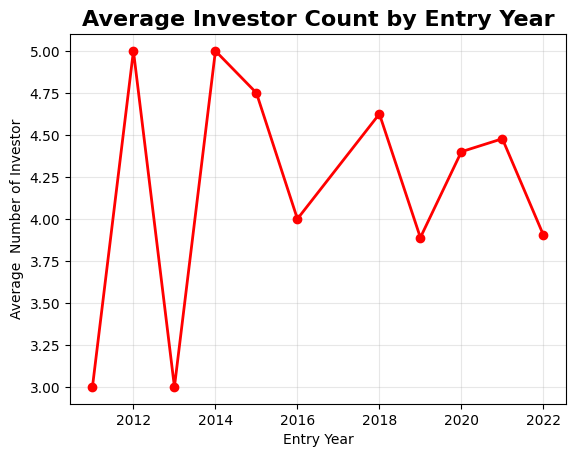

In [163]:
year_investor=df.groupby('Entry_Year')['Investor_Count'].mean()
plt.plot(year_investor.index,year_investor.values,marker='o',markersize=6,linewidth=2,color='red')
plt.title('Average Investor Count by Entry Year',fontsize=16,fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Average  Number of Investor')
plt.grid(True,alpha=0.3)
plt.show()



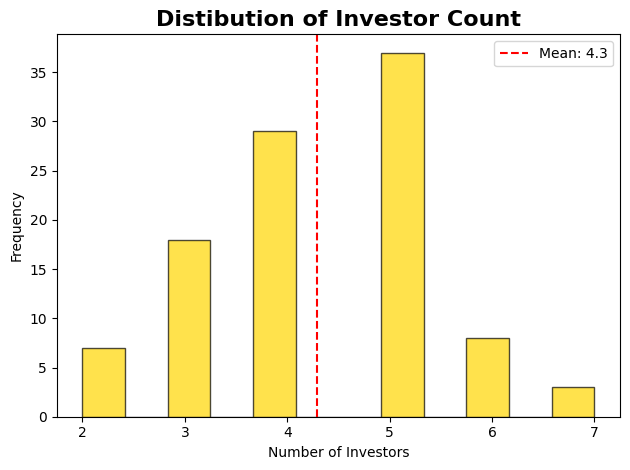

In [165]:
plt.hist(df['Investor_Count'],bins=12,alpha=0.7,color='gold',edgecolor='black')
plt.title('Distibution of Investor Count',fontsize=16,fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.axvline(df['Investor_Count'].mean(),color='red',linestyle='--',label=f'Mean: {df["Investor_Count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()